<a href="https://colab.research.google.com/github/Nckflannery/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel, ttest_1samp

## 1.) Load and clean the data

In [11]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

--2019-09-16 23:48:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-09-16 23:48:32 (127 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
# Read in data to df and label columns ###THANKS RYAN!

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants',
                          'water-project', 'budget', 'physician-fee-freeze', 
                          'el-salvador-aid', 'religious-groups', 
                          'anti-satellite-ban', 'aid-to-contras', 'mx-missile',
                          'immigration', 'synfuels', 'education', 
                          'right-to-sue','crime','duty-free', 'south-africa'])

In [13]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
# Clean data
df = df.replace({'y':1 , 'n':0, '?':np.nan})

In [142]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df.party == 'democrat']

In [144]:
dem.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


In [0]:
rep = df[df.party == 'republican']

In [146]:
rep.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
7,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,1.0
8,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
10,republican,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,1.0,0.0,0.0


## 2.) Using hypothesis testing, find an issue that Democrats support more than Republicans with p<0.01

$H_0$ = $\bar{x_1} = \bar{x_2}$ (Democratic support = Republican support)

$H_a$ = $\bar{x_1} \neq \bar{x_2}$ (Democratic support $\neq$ Republican support)

Confidence Level = 99%


In [54]:
ttest_ind(dem['anti-satellite-ban'], rep['anti-satellite-ban'], nan_policy='omit')

Ttest_indResult(statistic=12.526187929077842, pvalue=8.521033017443867e-31)

t-statistic = 12.526

p-value = 8.5e-31

---
Conclusion: Due to our p-value < .01, we reject the null hypothesis that Democratic and Republican support of Anti-Satellite-Ban bill are equal. Since we have a large, positive t-statistic, we infer that the mean yes votes for Democrats is greater than the mean yes votes for Republicans 

###Verify with .mean()

In [57]:
dem['anti-satellite-ban'].mean()

0.7722007722007722

In [58]:
rep['anti-satellite-ban'].mean()

0.24074074074074073

## 3.) Using hypothesis testing, find an issue that Republicans support more than Democrats with p<0.01

$H_0$ = $\bar{x_1} = \bar{x_2}$ (Republican support = Democratic support)

$H_a$ = $\bar{x_1} \neq \bar{x_2}$ (Republican support $\neq$ Democratic support)

Confidence Level = 99%

In [56]:
ttest_ind(rep['crime'], dem['crime'], nan_policy='omit')

Ttest_indResult(statistic=16.342085656197696, pvalue=9.952342705606092e-47)

t-statistic = 16.342

p-value = 9.95e-47

---
Conclusion: Due to our p-value < .01, we reject the null hypothesis that Democratic and Republican support of the Crime bill are equal. Since we have a large, positive t-statistic, we infer that the mean yes votes for Republicans is greater than the mean yes votes for Democrats 

###Verify with .mean()


In [59]:
rep['crime'].mean()

0.9813664596273292

In [60]:
dem['crime'].mean()

0.35019455252918286

## 4.) Using hypothesis testing, find an issue where the difference between Republicans and democrats has p>0.1 (i.e. there may not be much of a difference)

$H_0$ = $\bar{x_1} = \bar{x_2}$ (Republican support = Democratic support)

$H_a$ = $\bar{x_1} \neq \bar{x_2}$ (Republican support $\neq$ Democratic support)

Confidence Level = 90%

In [73]:
ttest_ind(rep['water-project'], dem['water-project'], nan_policy='omit')

Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)

t-statistic = 0.0889

p-value = 0.9291

---
Conclusion: Due to our p-value > 0.1, we fail to reject the null hypothesis that Democratic and Republican support of the Water Project bill are equal. Since we have a small, positive t-statistic, we infer that the mean yes votes for Republicans is almost equal (slightly greater) to the mean yes votes for Democrats 

###Verify with .mean()

In [71]:
dem['water-project'].mean()

0.502092050209205

In [72]:
rep['water-project'].mean()

0.5067567567567568

##Pre-stretch Goal


###1 sample t-tests

####$H_0$ = Democratic Support for Water Project bill = 100%

$H_a$ = Democratic Support for Water Project bill $\neq$ 100%

Confidence Level = 95%

In [78]:
ttest_1samp(dem['water-project'], 1, nan_policy='omit')

Ttest_1sampResult(statistic=-15.36283393995609, pvalue=1.8031537722768159e-37)

t-statistic = -15.3628

p-value = 1.8e-37

---
Due to our p-value < 0.05, we reject the null hypothesis that the Democrats  unanimously support the bill. The large, negative t-statistic implies that the support is less than 100%

In [97]:
dem['water-project'].mean()

0.502092050209205

####$H_0$ = Republican Support for South Africa bill < 20%

$H_a$ = Republican Support for South Africa bill > 20%

Confidence Level = 95%

In [106]:
ttest_1samp(rep['south-africa'], .2, nan_policy='omit')

Ttest_1sampResult(statistic=11.610203845468575, pvalue=1.90126934214634e-22)

t-statistic = 11.610

p-value = 1.9e-22

---
Due to our p-value < 0.05, and our t-statistic being a large, positive number, we reject the null hypothesis that Republican support for the South Africa bill was less than 20%

In [105]:
rep['south-africa'].mean()

0.6575342465753424

###Plotting stuff

In [132]:
ttest_ind(rep, dem, nan_policy='omit')

Ttest_indResult(statistic=masked_array(data=[-9.205264294809222, 0.08896538137868286,
                   -23.21277691701378, 49.36708157301406,
                   21.13669261173219, 9.737575825219457,
                   -12.526187929077842, -18.052093200819733,
                   -16.437503268542994, 1.7359117329695164,
                   -8.293603989407588, 20.500685724563073,
                   13.51064251060933, 16.342085656197696,
                   -12.853146132542978, -6.849454815841208],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
       fill_value=1e+20), pvalue=masked_array(data=[1.61344033e-018, 9.29155682e-001, 2.07034028e-077,
                   1.99426231e-177, 5.60052011e-068, 2.39367225e-020,
                   8.52103302e-031, 2.82471841e-054, 5.03079265e-047,
                   8.33024849e-002, 1.57593223e-015, 1.88342040e-064,
                   1.22785817e-034, 

In [17]:
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df_tidy = df.melt(id_vars='party')

In [16]:
df_tidy.head()

,party,variable,value
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,NaN
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


In [0]:
df_tidy = df_tidy.rename(columns={'variable' : 'Bill', 'value':'Vote'})

In [19]:
df_tidy.head()

,party,Bill,Vote
0,republican,handicapped-infants,0.0
1,republican,handicapped-infants,0.0
2,democrat,handicapped-infants,NaN
3,democrat,handicapped-infants,0.0
4,democrat,handicapped-infants,1.0


In [0]:
pvalues = [1.61344033e-018, 9.29155682e-001, 2.07034028e-077,
                   1.99426231e-177, 5.60052011e-068, 2.39367225e-020,
                   8.52103302e-031, 2.82471841e-054, 5.03079265e-047,
                   8.33024849e-002, 1.57593223e-015, 1.88342040e-064,
                   1.22785817e-034, 9.95234271e-047, 5.99769717e-032,
                   3.65267436e-011]

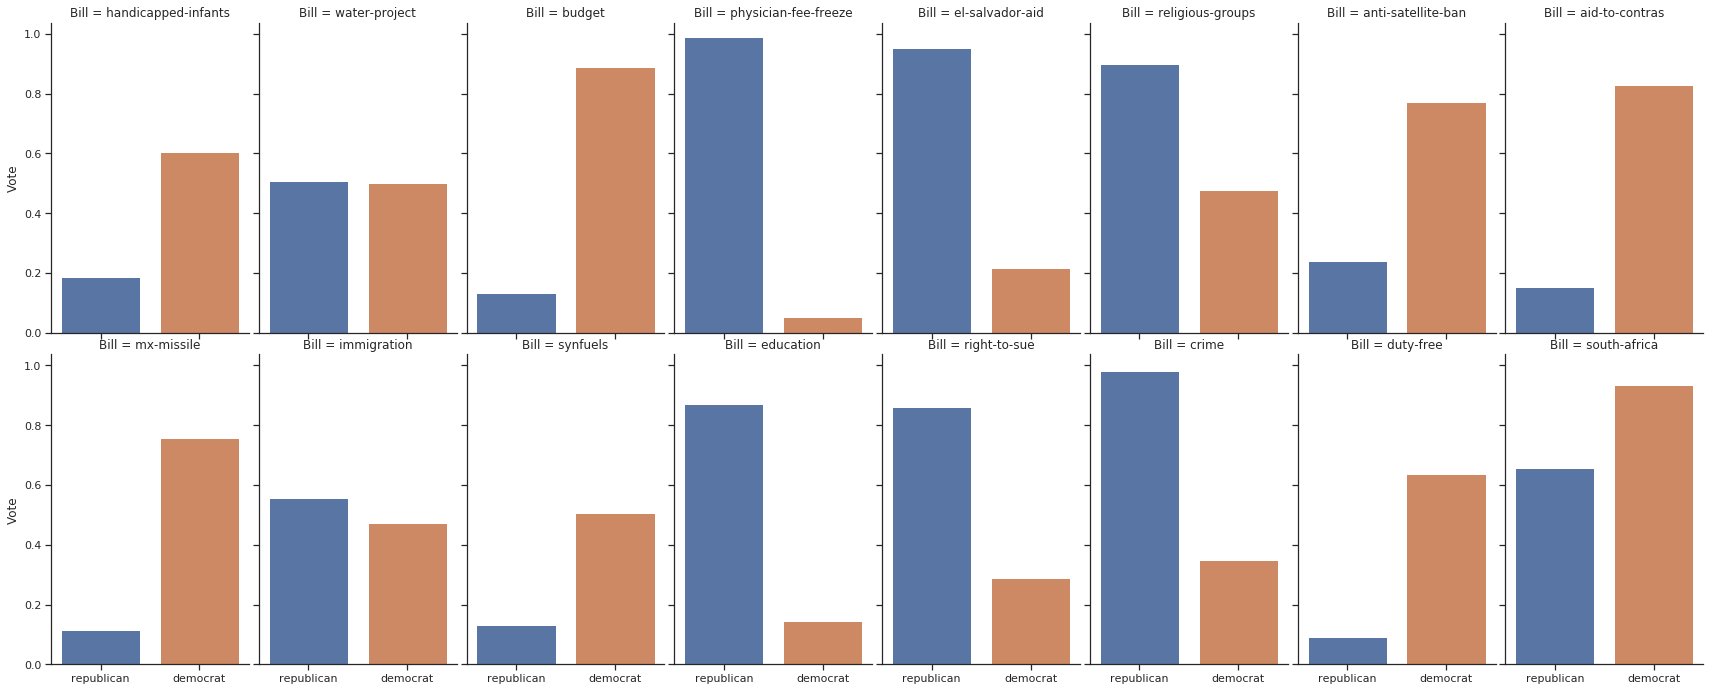

In [33]:
sns.set(style="ticks", color_codes=True)
g = sns.catplot(x='party', y='Vote', col='Bill', kind='bar', col_wrap=8, data=df_tidy, 
                ci=None, legend_out=True, aspect = .6)

g.set_axis_labels('', 'Vote').fig.subplots_adjust(wspace=.05, hspace=.07);